In [10]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [11]:
train_path = './data/train.csv'

data = pd.read_csv(train_path)

In [12]:
data.head(5)
# data.info()
# data.describe()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 先验分析 —— 检验影响登船因素的准确性

### 分析一：性别特征对获救的影响

In [13]:
female, male = data.groupby('Sex')['Survived'].sum()
print(f'{female} female survials, {male} male survials')

233 female survials, 109 male survials


* 分析结论2：女性幸存者是男性的两倍，性别特征重要

### 分析二：年龄对获救的影响

In [14]:
temp_data = data
temp_data['kid'] = temp_data['Age'].apply(lambda x: 1 if x <= 12 else 0)

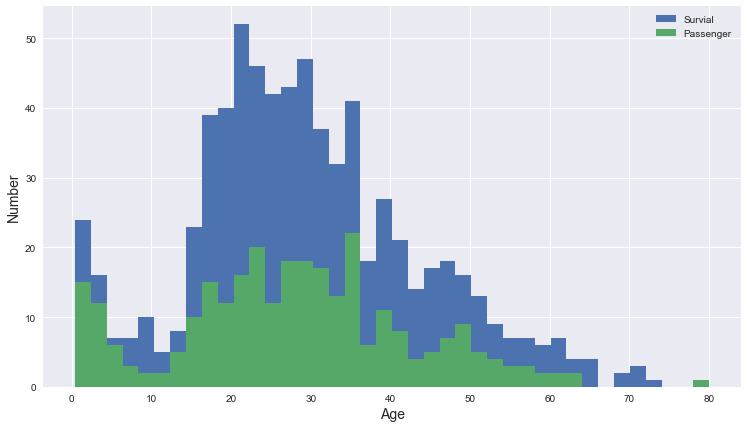

In [15]:
data_survived = data.set_index('Survived')

mpl.style.use('seaborn')
fig, ax = plt.subplots(figsize=(12.5, 7))

data['Age'].hist(ax=ax, bins=40)

data_survived.loc[1, 'Age'].hist(ax=ax, bins=40,)

ax.set_xlabel('Age', fontsize=14)
ax.set_ylabel('Number', fontsize=14)

ax.legend(['Survial', 'Passenger'])

* 分析结论2：小孩子的生存几率比其它年龄段大，但还是有很多的小孩没有获救。女士、小孩优先原则没有贯彻到底啊！

### 分析三： 船票等级与船票价格对于获救的影响

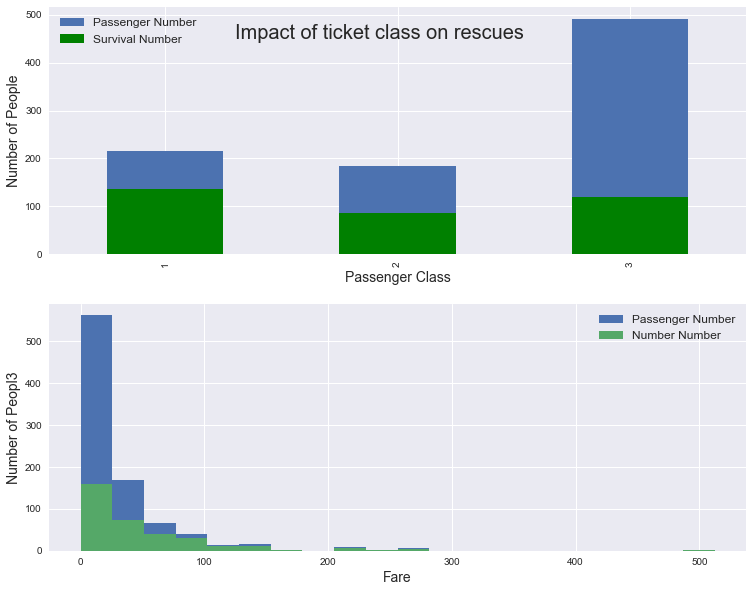

In [22]:
fig, ax = plt.subplots(2, figsize=(12.5,10))

data['Pclass'].value_counts().sort_index().plot.bar(ax=ax[0],)
data_survived.loc[1,'Pclass'].value_counts().sort_index().plot.bar(ax=ax[0], color='g')

ax[0].text(0.3, 450, 'Impact of ticket class on rescues', fontsize=20)
ax[0].set_xlabel('Passenger Class', fontsize=14)
ax[0].set_ylabel('Number of People', fontsize=14)
ax[0].legend(['Passenger Number', 'Survival Number'], fontsize=12)

data['Fare'].hist(ax=ax[1], bins=20)
data_survived.loc[1, 'Fare'].hist(ax=ax[1], bins=20)
ax[1].set_xlabel('Fare', fontsize=14)
ax[1].set_ylabel('Number of Peopl3', fontsize=14)
ax[1].legend(['Passenger Number', 'Number Number'], fontsize=12, loc=1)

* 分析结论3：第1等船票乘客的生存率稍微要大于第2等，显著大于第3等；而船票越贵，生存几率越大。危机面前，钱也管用。

# 特征挖掘 —— 从数据中发现被遗漏的有价值的信息

### 分析四: 兄弟配偶人数，父母子女人数对于生存的影响

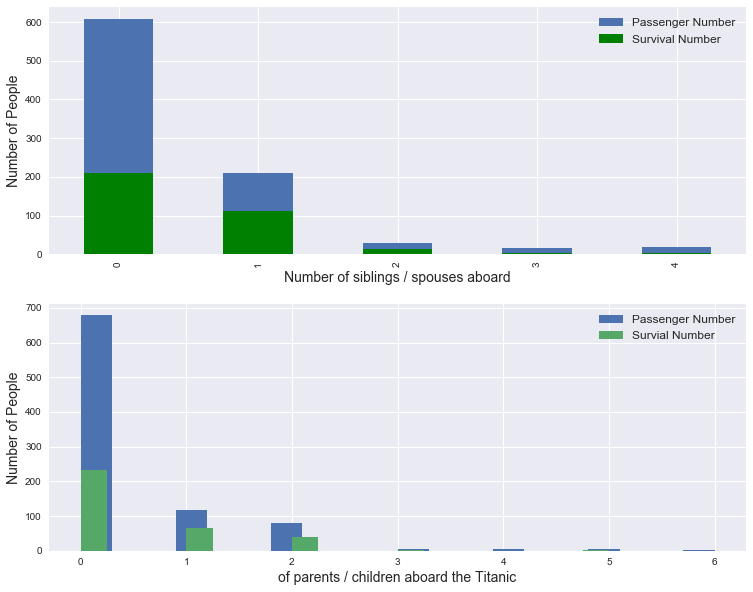

In [17]:
fig, ax = plt.subplots(2, figsize=(12.5,10))

data['SibSp'].value_counts().sort_index().plot.bar(ax=ax[0])
data_survived.loc[1,'SibSp'].value_counts().sort_index().plot.bar(ax=ax[0], color='g')

ax[0].set_xlabel('Number of siblings / spouses aboard', fontsize=14)
ax[0].set_ylabel('Number of People', fontsize=14)
ax[0].legend(['Passenger Number', 'Survival Number'], fontsize=12)

data['Parch'].hist(ax=ax[1], bins=20)
data_survived.loc[1, 'Parch'].hist(ax=ax[1], bins=20)
ax[1].set_xlabel('of parents / children aboard the Titanic', fontsize=14)
ax[1].set_ylabel('Number of People', fontsize=14)
ax[1].legend(['Passenger Number', 'Survial Number'], fontsize=12, loc=1)

* 分析结论4：亲人的人数越多，生存可能性越高。可能原因：一个家庭中，只要有聪明人一个人知道发生了什么，知道怎么做，一家子都可以得救。

### 分析五：登船点对于生存几率的影响

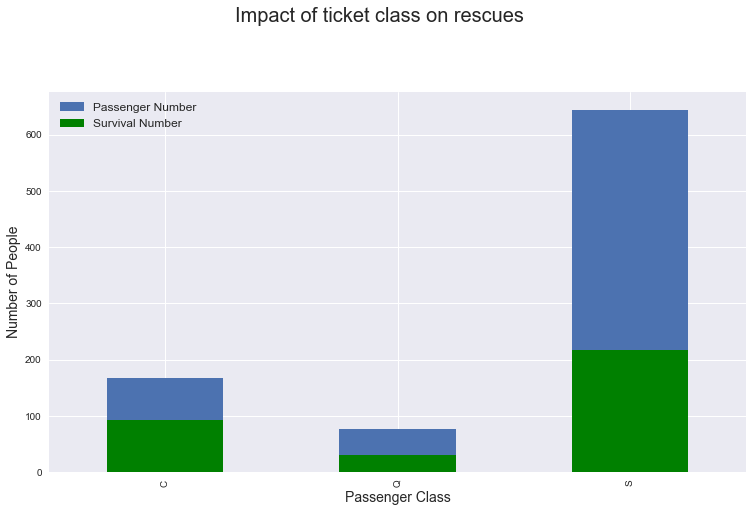

In [18]:
fig, ax = plt.subplots(1, figsize=(12.5,7))

data['Embarked'].value_counts().sort_index().plot.bar(ax=ax,)
data_survived.loc[1,'Embarked'].value_counts().sort_index().plot.bar(ax=ax, color='g')

ax.text(0.3, 800, 'Impact of ticket class on rescues', fontsize=20)
ax.set_xlabel('Passenger Class', fontsize=14)
ax.set_ylabel('Number of People', fontsize=14)
ax.legend(['Passenger Number', 'Survival Number'], fontsize=12)

* 分析结论5：登船点对于生存几率的影响不大